BirdCLEF 2021 - Birdcall 식별
==
이 대회의 목적은  다른 맥락에서 생성된 의미있는 훈련 데이터를 고려할 때 어떤 새들이 긴 녹음으로 부르고 있는지 식별하는 것입니다. 이 대회는 새로운 위치의 Sound scape, 더 많은 새 종, 테스트 세트 녹음에 대한 풍부한 메타 데이터, 훈련 세트에 Sound scape를 추가하여 이전 대회의 데이터를 기반으로합니다. 저는 dcase 2021의 dcase-few-shot-bioacoustic를 원래 분석하고 하였으나, 먼저 비슷한 데이터셋으로 연습을 해보고 도전해보고자 합니다.

In [1]:
!pip install nbmerge

  Created wheel for nbmerge: filename=nbmerge-0.0.4-py2.py3-none-any.whl size=6409 sha256=16f24dae10c30ca74ce78d98d9fa578cc6020b16289c5070e1a2cf3bd706bb88
  Stored in directory: c:\users\me\appdata\local\pip\cache\wheels\2d\3c\a9\8753a8ef327aca9c908d4f150628b87b548e1659ecc5fe1b54
Successfully built nbmerge


In [3]:
nbmerge audio-data-analysis-using-librosa.ipynb clean-fast-simple-bird-identifier.ipynb > merged.ipynb

SyntaxError: invalid syntax (<ipython-input-3-b5884a0bd7f9>, line 1)

데이터 설명
--

train_short_audio- 훈련 데이터의 대부분은 xenocanto.org 사용자가 관대하게 업로드한 개별 조류 호출의 짧은 녹음으로 구성됩니다 . 이러한 파일은 테스트 세트 오디오와 일치하도록 적용 가능한 32kHz로 다운 샘플링되고 ogg 형식으로 변환되었습니다. 훈련 데이터에는 거의 모든 관련 파일이 있어야합니다. 우리는 xenocanto.org 에서 더 많은 정보를 찾는 것이 아무런 이점이 없을 것으로 예상 합니다.

train_soundscapes- 테스트 세트와 매우 유사한 오디오 파일입니다. 모두 대략 10 분 길이이며 ogg 형식입니다. 테스트 세트에는 여기에 표시된 두 녹음 위치의 Sound scape도 있습니다.

test_soundscapes- 노트북을 제출할 때 test_soundscapes 디렉토리는 채점에 사용할 약 80 개의 녹음으로 채워집니다. 대략 10분 길이이며 ogg 오디오 형식입니다. 파일 이름에는 녹음 된 날짜가 포함되어있어 철새 식별에 특히 유용 할 수 있습니다.

이 폴더에는 녹음 위치의 이름과 대략적인 좌표가있는 텍스트 파일과 테스트 세트 Sound scape가 녹음된 날짜 집합이있는 csv도 포함되어 있습니다.

test.csv- 처음 세 행만 다운로드 할 수 있습니다. 전체 test.csv 는 은닉 테스트 세트에 있습니다.

row_id: 행의 ID 코드입니다.

site: 사이트 ID.

seconds: 두 번째 종료 time window

audio_id: 오디오 파일의 ID 코드.

train_metadata.csv- 훈련 데이터에 대해 광범위한 메타 데이터가 제공됩니다. 가장 직접적으로 관련된 분야는 다음과 같습니다.

primary_label: 조류 종에 대한 코드. American Crow https://ebird.org/species/와 같이 https://ebird.org/species/amecro에 코드를 추가하여 새 코드에 대한 자세한 정보를 검토 할 수 있습니다 .

recodist: 녹음을 제공 한 사용자입니다.

latitude& longitude: 녹음이 이루어진 위치의 좌표입니다. 일부 조류 종은 지역에서 '방언'이라고 부를 수 있으므로 훈련 데이터에서 지리적 다양성을 찾는 것이 좋습니다.

date: 알람 호출과 같은 일부 새 호출은 일년 내내 할 수 있지만 일부는 특정 계절에 제한됩니다. 훈련 데이터에서 시간적 다양성을 찾을 수 있습니다.

filename: 관련 오디오 파일의 이름입니다.

### train_soundscape_labels.csv

row_id: 행의 ID 코드입니다.

site: 사이트 ID.

seconds: 두 번째 종료 시간 창

audio_id: 오디오 파일의 ID 코드입니다.

birds: 5 초 창에있는 새 노래의 공백으로 구분된 목록입니다. 레이블 nocall은 호출이 발생하지 않았음을 의미합니다.

sample_submission.csv- 올바르게 구성된 샘플 제출 파일입니다. 처음 3 개 행만 공개되며 나머지는 숨겨진 테스트 세트의 일부로 노트북에 제공됩니다.

row_id

birds: 5 초 창에있는 새 노래의 공백으로 구분 된 목록입니다. 새소리가 없으면 nocall 레이블을 사용합니다.

분석에 사용할 library는 다음과 같습니다.
# Librosa
일반적으로 오디오 신호를 분석하지만 음악에 더 특화된 Python 모듈이다. 여기에는 MIR(음악 정보 검색) 시스템을 구축하는 너트와 볼트가 포함됩니다.
# IPython.display.Audio
Jupyter notebook에서 직접 오디오를 재생하게 해줍니다.

In [1]:
!pip install librosa

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

# Loading an audio file:

In [3]:
import librosa
audio_data = '/kaggle/input/birdsong-recognition/train_audio/nutwoo/XC462016.mp3'
x , sr = librosa.load(audio_data)
print(type(x), type(sr))
print(x.shape, sr)

/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


<class 'numpy.ndarray'> <class 'int'>
(1800000,) 22050


분석하고자 하는 오디오 파일을 kaggle 데이터셋에서 불러옵니다. 오디오 시계열은 기본 샘플링 속도(sr)가 22KHz 모노인 숫자 배열로 반환합니다. 44.1KHz로 다시 샘플링하여 이 동작을 변경할 수 있습니다.

In [4]:
librosa.load(audio_data, sr=44100)

/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


(array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 44100)

# Feature Extraction

### Audio 재생:

IPython.display.Audio 을 사용하면 jupyter notebook에서 audio를 재생할 수 있습니다.

In [5]:
import IPython.display as ipd
ipd.Audio(audio_data)

### Audio 시각화:

오디오 배열을 시각화합니다

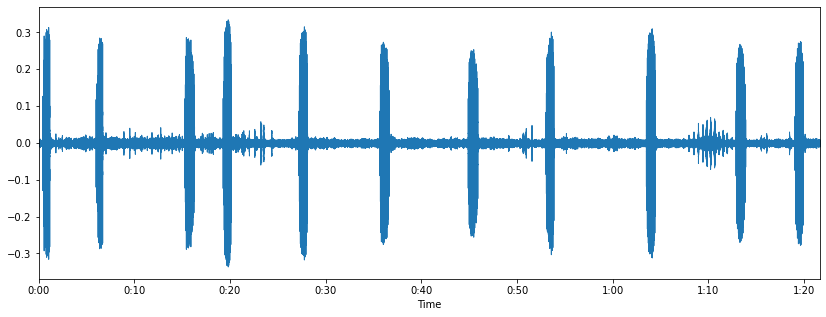

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

### Spectrogram
스펙트로그램은 특정 파형에 존재하는 다양한 주파수에서 시간 경과에 따른 신호의 신호 강도 또는 "음향"을 나타내는 시각적 방법입니다. 예를 들어 2 Hz 대 10 Hz에서 에너지가 더 많은지 적은지를 알 수 있을 뿐만 아니라 시간이 지남에 따라 에너지 수준이 어떻게 달라지는지도 알 수 있습니다.

스펙트로그램은 일반적으로 히트맵으로 표시되며, 색이나 밝기를 변경하여 표시되는 강도의 이미지로 표시됩니다.

librosa.display.specshow를 사용하여 스펙트로그램을 시각화 할 수 있습니다.

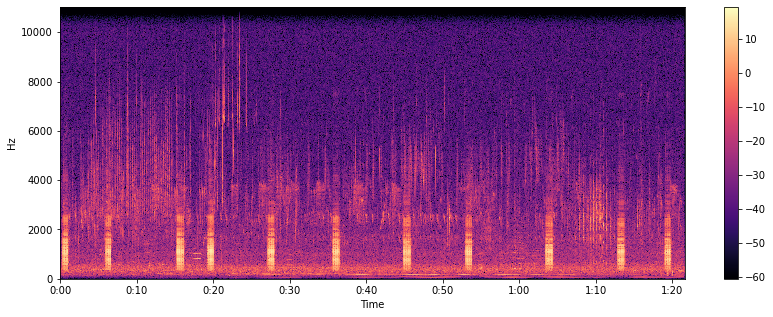

In [7]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

.stft()는 데이터를 단기 푸리에 변환으로 변환합니다. STFT는 지정된 시간에 지정된 주파수의 진폭을 알 수 있도록 신호를 변환합니다. STFT를 사용하면 오디오 신호의 지정된 시간에 재생되는 다양한 주파수의 진폭을 결정할 수 있습니다. specshow는 스펙트럼 프로그램을 표시하는 데 사용됩니다. 수직 축에는 주파수(0~10kHz)가 표시되고 수평 축에는 클립의 시간이 표시됩니다. 우리는 모든 작용이 스펙트럼의 하단에서 일어나고 있습니다는 것을 알기 때문에, 주파수 축을 로그로 변환할 수 있습니다.

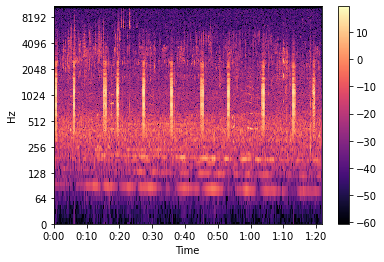

In [8]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

# 오디오 신호 만들기

In [9]:
sr = 22050 # 표본 rate
T = 5.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # 시간 변수
x = 0.5*np.sin(2*np.pi*220*t)# 순수한 sine wave는 220 Hz이기 때문입니다.
#오디오 재생
ipd.Audio(x, rate=sr)
#오디오 저장
librosa.output.write_wav('tone_220.wav', x, sr)

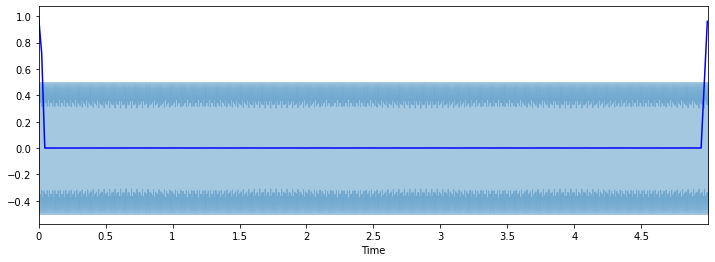

In [10]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
# 시각화를 위해 시간 변수를 계산합니다.
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# 시각화를 위해 스펙트럼 중심을 정규화합니다.
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
# 파형을 따라 스펙트럼 중심을 표시합니다.
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

.spectral_centroid는 표본에 있는 프레임 수와 동일한 열을 가진 배열을 반환합니다.

# Spectral Rolloff
아래의 값은 신호의 모양을 측정한 것입니다. 높은 주파수가 0으로 감소하는 빈도를 보입니다. 이를 얻기 위해, 우리는 power 스펙트럼에서 fraction of bins을 계산해야 합니다. 85%의 power가 더 낮은 주파수입니다.

librosa.feature.spectral_rolloff는 신호의 각 프레임에 대한 rolloff 주파수를 계산합니다

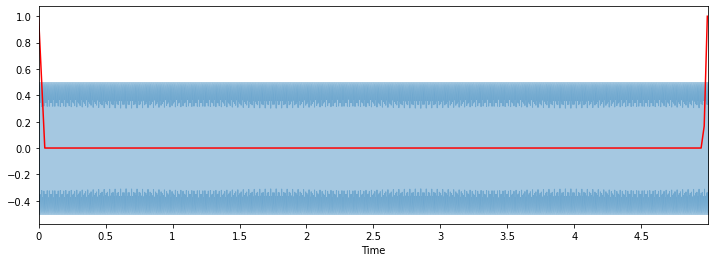

In [11]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

# Spectral Bandwidth
스펙트럼 대역폭은 피크 최대치의 1/2에서 빛의 대역폭(또는 절반 최대FWHM에서 전체 폭)으로 정의되며, 파장 축에 있는 두 개의 수직 적색 선과  λSB로 표시됩니다.

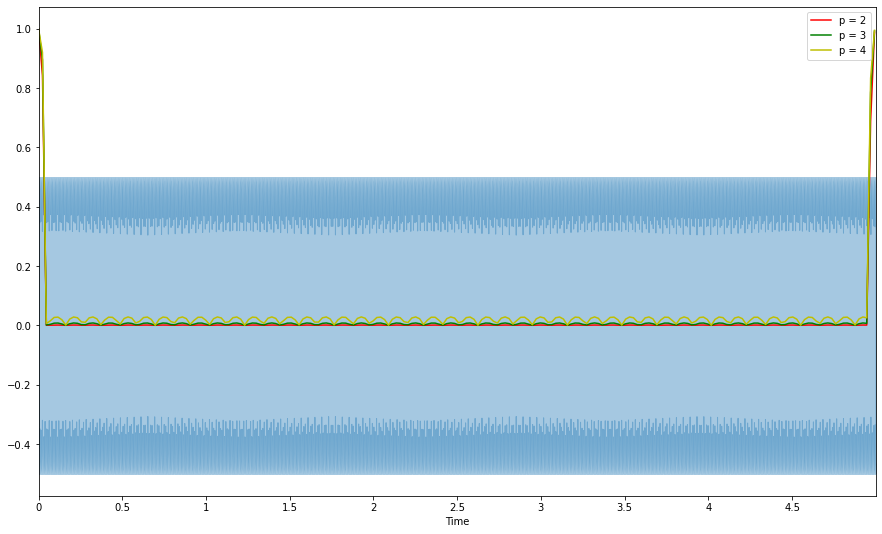

In [12]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


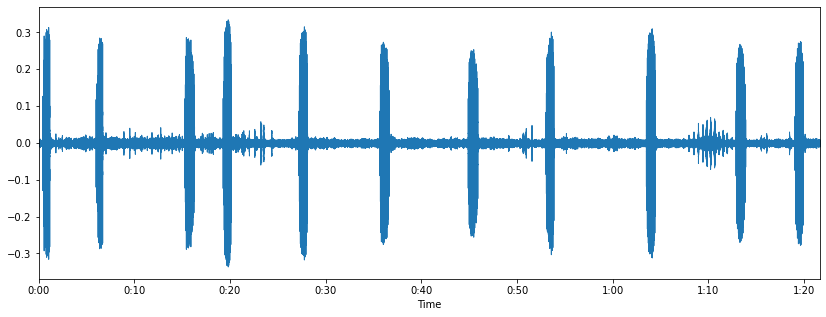

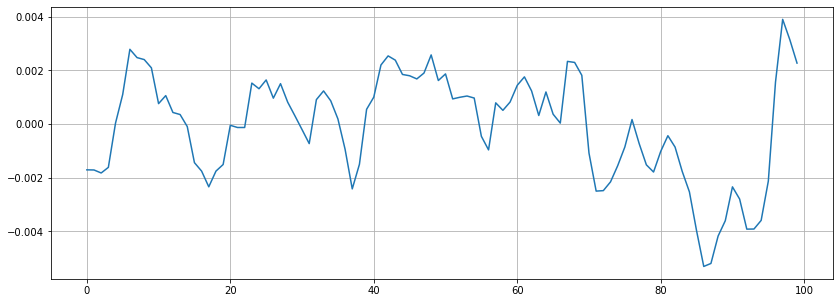

In [13]:
x, sr = librosa.load(audio_data)
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

## How many zero crossings?
zero crossings rate(ZCR)는 신호가 양의 값에서 0으로, 음의 값에서 양의 값으로, 또는 음의 값에서 양의 값으로 변하는 rate 입니다. 이 값은 음성 인식과 음악 정보 검색 모두에서 널리 사용되어 왔으며, 타악음을 분류하는 핵심 기능입니다.

In [14]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

13


# Mel-Frequency Cepstral Coefficients(MFCCs)
MFCC는 오디오 신호에서 추출할 수 있는 feature로, 소리의 고유한 특징을 나타내는 수치입니다. 주로 음성 인식, 화자 인식, 음성 합성, 음악 장르 분류 등 오디오 도메인의 문제를 해결하는 데 사용됩니다.

(20, 3516)


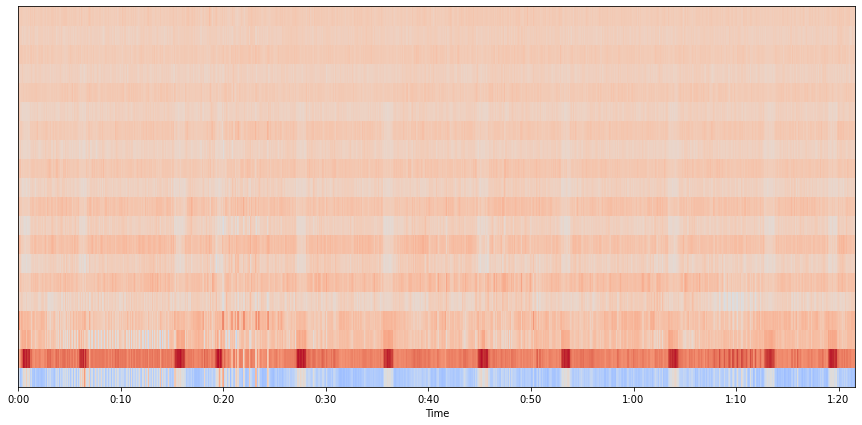

In [15]:
fs=10
mfccs = librosa.feature.mfcc(x, sr=fs)
print(mfccs.shape)
(20, 97)
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

# Chroma feature
12 음계로 분류해 봤을 때의 데이터를 그려봤습니다.

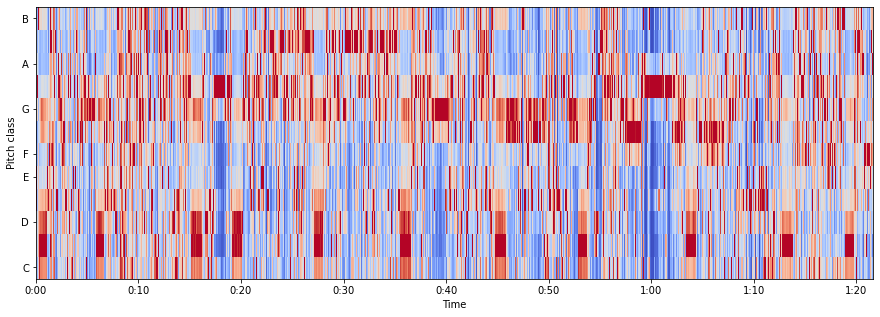

In [16]:
hop_length=12
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

# Model construction

# Resnet Model
이 모형은 Resnet baseline을 기준으로 제작되었으며, ResNet50 모형을 사용하였습니다.

In [2]:
try:
    import resnest
except ModuleNotFoundError:
    !pip install -q "../input/resnest50-fast-package/resnest-0.0.6b20200701/resnest"

In [3]:
import numpy as np
import librosa as lb
import soundfile as sf
import pandas as pd
import cv2
from pathlib import Path
import re

import torch
from torch import nn
from  torch.utils.data import Dataset, DataLoader

from tqdm.notebook import tqdm

import time
from resnest.torch import resnest50

# Configs

In [4]:
NUM_CLASSES = 397
SR = 32_000
DURATION = 5
THRESH = 0.1


DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("DEVICE:", DEVICE)

TEST_AUDIO_ROOT = Path("../input/birdclef-2021/test_soundscapes")
SAMPLE_SUB_PATH = "../input/birdclef-2021/sample_submission.csv"
TARGET_PATH = None
    
if not len(list(TEST_AUDIO_ROOT.glob("*.ogg"))):
    TEST_AUDIO_ROOT = Path("../input/birdclef-2021/train_soundscapes")
    SAMPLE_SUB_PATH = None
    TARGET_PATH = Path("../input/birdclef-2021/train_soundscape_labels.csv")

DEVICE: cpu


위의 데이터셋을 이용한 결과보다 이 데이터셋을 이용한 결과가 더 좋았기에, 이 데이터셋을 사용하여 분석하였습니다.

# Data

In [5]:
class MelSpecComputer:
    def __init__(self, sr, n_mels, fmin, fmax, **kwargs):
        self.sr = sr
        self.n_mels = n_mels
        self.fmin = fmin
        self.fmax = fmax
        kwargs["n_fft"] = kwargs.get("n_fft", self.sr//10)
        kwargs["hop_length"] = kwargs.get("hop_length", self.sr//(10*4))
        self.kwargs = kwargs

    def __call__(self, y):
        melspec = lb.feature.melspectrogram(
            y, sr=self.sr, n_mels=self.n_mels, fmin=self.fmin, fmax=self.fmax, **self.kwargs,
        )
        melspec = lb.power_to_db(melspec).astype(np.float32)
        return melspec

In [6]:
def mono_to_color(X, eps=1e-6, mean=None, std=None):
    mean = mean or X.mean()
    std = std or X.std()
    X = (X - mean) / (std + eps)
    
    _min, _max = X.min(), X.max()

    if (_max - _min) > eps:
        V = np.clip(X, _min, _max)
        V = 255 * (V - _min) / (_max - _min)
        V = V.astype(np.uint8)
    else:
        V = np.zeros_like(X, dtype=np.uint8)

    return V

def crop_or_pad(y, length):
    if len(y) < length:
        y = np.concatenate([y, length - np.zeros(len(y))])
    elif len(y) > length:
        y = y[:length]
    return y

In [7]:
class BirdCLEFDataset(Dataset):
    def __init__(self, data, sr=SR, n_mels=128, fmin=0, fmax=None, duration=DURATION, step=None, res_type="kaiser_fast", resample=True):
        
        self.data = data
        
        self.sr = sr
        self.n_mels = n_mels
        self.fmin = fmin
        self.fmax = fmax or self.sr//2

        self.duration = duration
        self.audio_length = self.duration*self.sr
        self.step = step or self.audio_length
        
        self.res_type = res_type
        self.resample = resample

        self.mel_spec_computer = MelSpecComputer(sr=self.sr, n_mels=self.n_mels, fmin=self.fmin,
                                                 fmax=self.fmax)
    def __len__(self):
        return len(self.data)
    
    @staticmethod
    def normalize(image):
        image = image.astype("float32", copy=False) / 255.0
        image = np.stack([image, image, image])
        return image
    
    def audio_to_image(self, audio):
        melspec = self.mel_spec_computer(audio)
        
        image = mono_to_color(melspec)
        image = self.normalize(image)
        return image

    def read_file(self, filepath):
        audio, orig_sr = sf.read(filepath, dtype="float32")

        if self.resample and orig_sr != self.sr:
            audio = lb.resample(audio, orig_sr, self.sr, res_type=self.res_type)
          
        audios = []
        for i in range(self.audio_length, len(audio) + self.step, self.step):
            start = max(0, i - self.audio_length)
            end = start + self.audio_length
            audios.append(audio[start:end])
            
        if len(audios[-1]) < self.audio_length:
            audios = audios[:-1]
            
        images = [self.audio_to_image(audio) for audio in audios]
        images = np.stack(images)
        
        return images
    
        
    def __getitem__(self, idx):
        return self.read_file(self.data.loc[idx, "filepath"])

In [8]:
data = pd.DataFrame(
     [(path.stem, *path.stem.split("_"), path) for path in Path(TEST_AUDIO_ROOT).glob("*.ogg")],
    columns = ["filename", "id", "site", "date", "filepath"]
)
print(data.shape)
data.head()

(20, 5)


,filename,id,site,date,filepath
0,20152_SSW_20170805,20152,SSW,20170805,../input/birdclef-2021/train_soundscapes/20152...
1,57610_COR_20190904,57610,COR,20190904,../input/birdclef-2021/train_soundscapes/57610...
2,7843_SSW_20170325,7843,SSW,20170325,../input/birdclef-2021/train_soundscapes/7843_...
3,42907_SSW_20170708,42907,SSW,20170708,../input/birdclef-2021/train_soundscapes/42907...
4,7019_COR_20190904,7019,COR,20190904,../input/birdclef-2021/train_soundscapes/7019_...


데이터를 불러오고, 정리한 예시입니다.

In [9]:
df_train = pd.read_csv("../input/birdclef-2021/train_metadata.csv")

LABEL_IDS = {label: label_id for label_id,label in enumerate(sorted(df_train["primary_label"].unique()))}
INV_LABEL_IDS = {val: key for key,val in LABEL_IDS.items()}

# Inference

In [10]:
test_data = BirdCLEFDataset(data=data)
print(len(test_data))

print(test_data[0].shape)

20
(120, 3, 128, 201)


In [11]:
import sys 
sys.path.append('../input/timm-pytorch-image-models/pytorch-image-models-master') 
import timm 
import torch
import torch.nn as nn

class densenet(nn.Module):
    def __init__(self, n_class=397, model_name='densenet121', pretrained=False):
        super().__init__()
        self.model = timm.create_model(model_name, pretrained=pretrained,num_classes=0)
        self.dropout = torch.nn.Dropout(p=0.2)
        self.classifier = nn.Linear(1024, n_class)

    def forward(self, x):
        x = self.model(x)
        x = self.dropout(x)
        x = self.classifier(x)
        
        return x

class nfnet(nn.Module):
    def __init__(self, n_class=397, model_name='eca_nfnet_l0', pretrained=False):
        super().__init__()
        self.model = timm.create_model(model_name, pretrained=pretrained,num_classes=0)
        self.dropout = torch.nn.Dropout(p=0.4)
        self.classifier = nn.Linear(2304, n_class)

    def forward(self, x):
        x = self.model(x)
        x = self.dropout(x)
        x = self.classifier(x)
        
        return x

In [12]:
def load_densenet(checkpoint_path, num_classes=NUM_CLASSES):
    net = densenet(pretrained=False)
    dummy_device = torch.device("cpu")
    d = torch.load(checkpoint_path, map_location=dummy_device)
#     for key in list(d.keys()):
#         d[key.replace("model.", "")] = d.pop(key)
    net.load_state_dict(d)
    net = net.to(DEVICE)
    net = net.eval()
    return net

def load_resnest50dnet(checkpoint_path, num_classes=NUM_CLASSES):
    net = timm.create_model('resnest50d',pretrained=False)
    net.fc = nn.Linear(net.fc.in_features, num_classes)
    dummy_device = torch.device("cpu")
    d = torch.load(checkpoint_path, map_location=dummy_device)
    for key in list(d.keys()):
        d[key.replace("model.", "")] = d.pop(key)
    net.load_state_dict(d)
    net = net.to(DEVICE)
    net = net.eval()
    return net

def load_resnestnet(checkpoint_path, num_classes=NUM_CLASSES):
    net = resnest50(pretrained=False)
    net.fc = nn.Linear(net.fc.in_features, num_classes)
    dummy_device = torch.device("cpu")
    d = torch.load(checkpoint_path, map_location=dummy_device)
    for key in list(d.keys()):
        d[key.replace("model.", "")] = d.pop(key)
    net.load_state_dict(d)
    net = net.to(DEVICE)
    net = net.eval()
    return net

def load_nfnet(checkpoint_path, num_classes=NUM_CLASSES):
    net = nfnet(pretrained=False)
    dummy_device = torch.device("cpu")
    d = torch.load(checkpoint_path, map_location=dummy_device)
#     for key in list(d.keys()):
#         d[key.replace("model.", "")] = d.pop(key)
    net.load_state_dict(d)
    net = net.to(DEVICE)
    net = net.eval()
    return net


In [13]:

checkpoint_paths = [
    Path("../input/kkiller-birdclef-models-public/birdclef_resnest50_fold0_epoch_10_f1_val_06471_20210417161101.pth"),
]


nets = [
    load_resnestnet(checkpoint_paths[0]),
    
]

In [14]:
@torch.no_grad()
def get_thresh_preds(out, thresh=None):
    thresh = thresh or THRESH
    o = (-out).argsort(1)
    npreds = (out > thresh).sum(1)
    preds = []
    for oo, npred in zip(o, npreds):
        preds.append(oo[:npred].cpu().numpy().tolist())
    return preds

In [15]:
def get_bird_names(preds):
    bird_names = []
    for pred in preds:
        if not pred:
            bird_names.append("nocall")
        else:
            bird_names.append(" ".join([INV_LABEL_IDS[bird_id] for bird_id in pred]))
    return bird_names

In [16]:
def predict(nets, test_data, names=True):
    preds = []
    with torch.no_grad():
        for idx in  tqdm(list(range(len(test_data)))):
            xb = torch.from_numpy(test_data[idx]).to(DEVICE)
            pred = 0.
            for net in nets:
                o = net(xb)
                o = torch.sigmoid(o)

                pred += o

            pred /= len(nets)
            
            if names:
                pred = get_bird_names(get_thresh_preds(pred))

            preds.append(pred)
    return preds

In [17]:
pred_probas = predict(nets, test_data, names=False)
print(len(pred_probas))

  0%|          | 0/20 [00:00<?, ?it/s]

20


In [18]:
preds = [get_bird_names(get_thresh_preds(pred, thresh=THRESH)) for pred in pred_probas]

In [19]:
def preds_as_df(data, preds):
    sub = {
        "row_id": [],
        "birds": [],
    }
    
    for row, pred in zip(data.itertuples(False), preds):
        row_id = [f"{row.id}_{row.site}_{5*i}" for i in range(1, len(pred)+1)]
        sub["birds"] += pred
        sub["row_id"] += row_id
        
    sub = pd.DataFrame(sub)
    
    if SAMPLE_SUB_PATH:
        sample_sub = pd.read_csv(SAMPLE_SUB_PATH, usecols=["row_id"])
        sub = sample_sub.merge(sub, on="row_id", how="left")
        sub["birds"] = sub["birds"].fillna("nocall")
    return sub

In [20]:
sub = preds_as_df(data, preds)
print(sub.shape)

(2400, 2)


In [21]:
sub.to_csv("submission.csv", index=False)

# Small validation

In [22]:
def get_metrics(s_true, s_pred):
    s_true = set(s_true.split())
    s_pred = set(s_pred.split())
    n, n_true, n_pred = len(s_true.intersection(s_pred)), len(s_true), len(s_pred)
    
    prec = n/n_pred
    rec = n/n_true
    f1 = 2*prec*rec/(prec + rec) if prec + rec else 0
    
    return {"f1": f1, "prec": prec, "rec": rec, "n_true": n_true, "n_pred": n_pred, "n": n}

In [23]:
if TARGET_PATH:
    sub_target = pd.read_csv(TARGET_PATH)
    sub_target = sub_target.merge(sub, how="left", on="row_id")
    
    assert sub_target["birds_x"].notnull().all()
    assert sub_target["birds_y"].notnull().all()
    
    df_metrics = pd.DataFrame([get_metrics(s_true, s_pred) for s_true, s_pred in zip(sub_target.birds_x, sub_target.birds_y)])
    
    print(df_metrics.mean())

f1        0.701208
prec      0.711042
rec       0.698243
n_true    1.130000
n_pred    1.017083
n         0.718750
dtype: float64


실제로, validation set으로 해본 결과는 이렇게 나왔다. F1 score는 제법 높은 편이다.

In [24]:
sub_target[sub_target.birds_y != "nocall"]

,row_id,site,audio_id,seconds,birds_x,birds_y
12,7019_COR_65,COR,7019,65,nocall,bucmot2
16,7019_COR_85,COR,7019,85,nocall,bucmot2
35,7019_COR_180,COR,7019,180,nocall,higmot1
41,7019_COR_210,COR,7019,210,nocall,bucmot2
63,7019_COR_320,COR,7019,320,nocall,bucmot2
...,...,...,...,...,...,...
2273,51010_SSW_570,SSW,51010,570,bkcchi norcar,bkcchi
2275,51010_SSW_580,SSW,51010,580,bkcchi,rewbla
2278,51010_SSW_595,SSW,51010,595,bkcchi,bkcchi
2279,51010_SSW_600,SSW,51010,600,bkcchi,bkcchi


In [25]:
sub_target[sub_target.birds_x != "nocall"]

,row_id,site,audio_id,seconds,birds_x,birds_y
240,11254_COR_5,COR,11254,5,rubwre1,rubwre1 wbwwre1 burwar1
242,11254_COR_15,COR,11254,15,rubwre1,wbwwre1
244,11254_COR_25,COR,11254,25,rubwre1,rubwre1
267,11254_COR_140,COR,11254,140,obnthr1,nocall
268,11254_COR_145,COR,11254,145,obnthr1,nocall
...,...,...,...,...,...,...
2391,54955_SSW_560,SSW,54955,560,grycat,nocall
2393,54955_SSW_570,SSW,54955,570,grycat,grycat
2394,54955_SSW_575,SSW,54955,575,chswar,nocall
2396,54955_SSW_585,SSW,54955,585,grycat,nocall


# 결론

계획
1. 앞으로의 논문 진행을 위한 예행연습으로써, 새의 소리를 detect하고 분류하는 방법을 배운다.
2. 음성 데이터를 시각화하는 방법을 배운다.

의의

1. Feature dectection을 위해 새의 소리를 가지고 오디오를 시각화하는 여러 가지 기법 배우고, 활용해 볼 수 있었다.
2. ResNet50을 이용한 모델을 구축하여 분류 모형을 구축하고, 실제 정답과 비교하는 기회를 가질 수 있었다.

한계점

1. ResNet 모형만을 이용하였으므로, Ensemble이나 Boosting한 모형보다 결과가 나쁠 수 있다.
2. 다른 참가자들의 경우, Mixup 기법 등을 이용해 Data Augumentation을 하였으나 하지 못했다.
3. EfficientNet, NfNet등의 기법을 사용해보지 못했다.